# Notes in Chapter 7

## 7.1 A dataset of tiny images

In [1]:
from torchvision import datasets

data_path = 'data/ch7/'
cifar10 = datasets.CIFAR10(data_path, train=True, download=True)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True)

100.0%Extracting data/ch7/cifar-10-python.tar.gz to data/ch7/
Files already downloaded and verified


In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [3]:
type(cifar10).__mro__

(torchvision.datasets.cifar.CIFAR10,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 object)

In [4]:
len(cifar10)

50000

In [6]:
img, label = cifar10[99]
img, label, class_names[label]

(<PIL.Image.Image image mode=RGB size=32x32 at 0x1EAB8C3CB08>, 1, 'automobile')

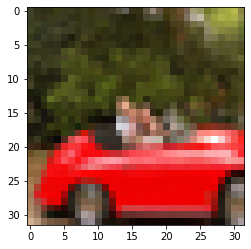

In [7]:
from matplotlib import pyplot as plt

plt.imshow(img)
plt.show()

In [8]:
from torchvision import transforms

dir(transforms)

['CenterCrop',
 'ColorJitter',
 'Compose',
 'FiveCrop',
 'Grayscale',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'Pad',
 'RandomAffine',
 'RandomApply',
 'RandomChoice',
 'RandomCrop',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomOrder',
 'RandomPerspective',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSizedCrop',
 'RandomVerticalFlip',
 'Resize',
 'Scale',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'functional',
 'transforms']

In [9]:
from torchvision import transforms

to_tensor = transforms.ToTensor()
img_t = to_tensor(img)
img_t.shape

torch.Size([3, 32, 32])

In [10]:
tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download=False, transform=transforms.ToTensor())

In [12]:
img_t, _ = tensor_cifar10[99]
img_t.shape

torch.Size([3, 32, 32])

In [13]:
img_t.min(), img_t.max()

(tensor(0.), tensor(1.))

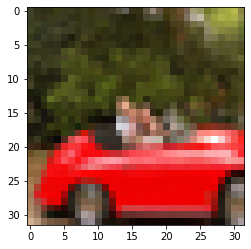

In [14]:
plt.imshow(img_t.permute(1, 2, 0))
plt.show()

In [17]:
import torch

imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)
imgs.shape

torch.Size([3, 32, 32, 50000])

In [18]:
imgs.view(3, -1).mean(dim=1)

tensor([0.4915, 0.4823, 0.4468])

In [20]:
imgs.view(3, -1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [21]:
transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))

Normalize(mean=(0.4915, 0.4823, 0.4468), std=(0.247, 0.2435, 0.2616))

In [22]:
transformd_cifar10 = datasets.CIFAR10(
    data_path, train=True, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))
    ])
)

In [83]:
tensor_cifar10_val = datasets.CIFAR10(data_path, train=False, download=False, transform=transforms.ToTensor())

imgs = torch.stack([img_t for img_t, _ in tensor_cifar10_val], dim=3)
imgs.shape

torch.Size([3, 32, 32, 10000])

In [85]:
imgs.view(3, -1).mean(dim=1)

tensor([0.4943, 0.4852, 0.4506])

In [86]:
imgs.view(3, -1).std(dim=1)

tensor([0.2467, 0.2429, 0.2616])

In [87]:
transformd_cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=False, transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4943, 0.4852, 0.4506), (0.2467, 0.2429, 0.2616))
    ]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


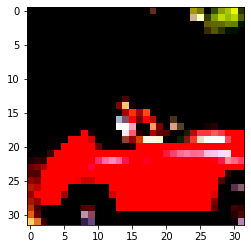

In [23]:
img_t, _ = transformd_cifar10[99]

plt.imshow(img_t.permute(1, 2, 0))
plt.show()

## 7.2 Distinguishing birds from airplanes

In [88]:
label_map = {0:0, 2:1}
class_names = ['airplane', 'bird']
cifar2 = [(img, label_map[label]) for img, label in transformd_cifar10 if label in [0, 2]]
cifar2_val = [(img, label_map[label]) for img, label in transformd_cifar10_val if label in [0, 2]]


In [1]:
type(cifar2)

NameError: name 'cifar2' is not defined

In [104]:
img, _ = cifar2_val[0]
img.shape

torch.Size([3, 32, 32])

In [25]:
import torch.nn as nn

n_out = 2
model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, n_out)
)

In [37]:
def softmax(x):
    return torch.exp(x) / torch.exp(x).sum()

In [40]:
x = torch.tensor([1.0, 2.0, 3.0])
softmax(x)

tensor([0.0900, 0.2447, 0.6652])

In [41]:
softmax(x).sum()

tensor(1.)

In [43]:
softmax = nn.Softmax(dim=1)

x = torch.tensor([[1.0, 2.0, 3.0], [1.0, 2.0, 3.0]])
softmax(x)

tensor([[0.0900, 0.2447, 0.6652],
        [0.0900, 0.2447, 0.6652]])

In [54]:
model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, 2),
    nn.Softmax(dim=1)
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


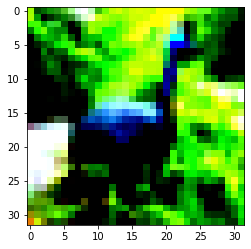

In [78]:
img, _ = cifar2[0]

plt.imshow(img.permute(1, 2, 0))
plt.show()

In [82]:
img_batch = img.view(-1).unsqueeze(0)

out = model(img_batch)
out

tensor([[0.4145, 0.5855]], grad_fn=<SoftmaxBackward>)

In [89]:
_, index = torch.max(out, dim=1)
index

tensor([1])

In [90]:
model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, 2),
    nn.LogSoftmax(dim=1)
)

loss = nn.NLLLoss()

In [96]:
img, label = cifar2[0]
out = model(img.view(-1).unsqueeze(0))
loss(out, torch.tensor([label]))

tensor(0.7337, grad_fn=<NllLossBackward>)

In [99]:
import torch.optim as optim
import torch.nn as nn

model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, 2),
    nn.LogSoftmax(dim=1)
)

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for img, label in cifar2:
        out = model(img.view(-1).unsqueeze(0))
        loss = loss_fn(out, torch.tensor([label]))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    # print the loss for the last image
    print('Epoch: {}, Loss: {:.4f}'.format(epoch, float(loss)))

Epoch: 0, Loss: 3.7388
Epoch: 1, Loss: 6.1580


KeyboardInterrupt: 

In [106]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=batch_size, shuffle=True)

model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, 2),
    nn.LogSoftmax(dim=1)    
)

learning_rate=1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    # print the loss for a random batch
    print('Epoch: {}, Loss: {:.4f}'.format(epoch, float(loss)))

Epoch: 0, Loss: 0.6243
Epoch: 1, Loss: 0.6659
Epoch: 2, Loss: 0.2755


KeyboardInterrupt: 

In [112]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=32, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())

print('Accuracy: ', correct / total)

Accuracy:  0.8175


In [113]:
numel_list = [p.numel() for p in model.parameters() if p.requires_grad==True]

sum(numel_list), numel_list

(1574402, [1572864, 512, 1024, 2])